<a href="https://colab.research.google.com/github/belawastaken/colab/blob/main/prototyp_BelaHeischkel_DharaKast_Emma_MarieGehrmann.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analyse der Apple Aktie (AAPL) - 2025

Wir analysieren die **Apple** Aktie im Jahr 2025. Dabei betrachten wir Kursverläufe, tägliche Renditen, Volatilitäten und die Korrelation zu Konkurrenten.

### 1. Historischer Kursverlauf und Trendbestimmung
Im ersten Schritt visualisieren wir den Kursverlauf des Jahres 2025 und legen einen Trendfilter darüber.

**Methodische Grundlagen:**
* **Warum "Close"-Preise?** Wir nutzen für alle Berechnungen den täglichen Schlusskurs (*Close*). Der Schlusskurs gilt als der wichtigste Preis des Tages, da er den finalen Konsens aller Marktteilnehmer (Käufer und Verkäufer) widerspiegelt und die Basis für die Bewertung institutioneller Portfolios bildet. Intraday-Schwankungen werden so ausgeblendet.
* **Der 20-Tage-Trend (SMA 20):** Wir berechnen den einfachen gleitenden Durchschnitt der letzten 20 Handelstage (entspricht etwa einem Handelsmonat). Dieser Indikator glättet kurzfristige Ausreißer und zeigt die kurz- bis mittelfristige Trendrichtung an.

/tmp/ipython-input-2891525069.py:12: FutureWarning: YF.download() has changed argument auto_adjust default to True
  Data_Apple_full = yf.download(
[*********************100%***********************]  1 of 1 completed


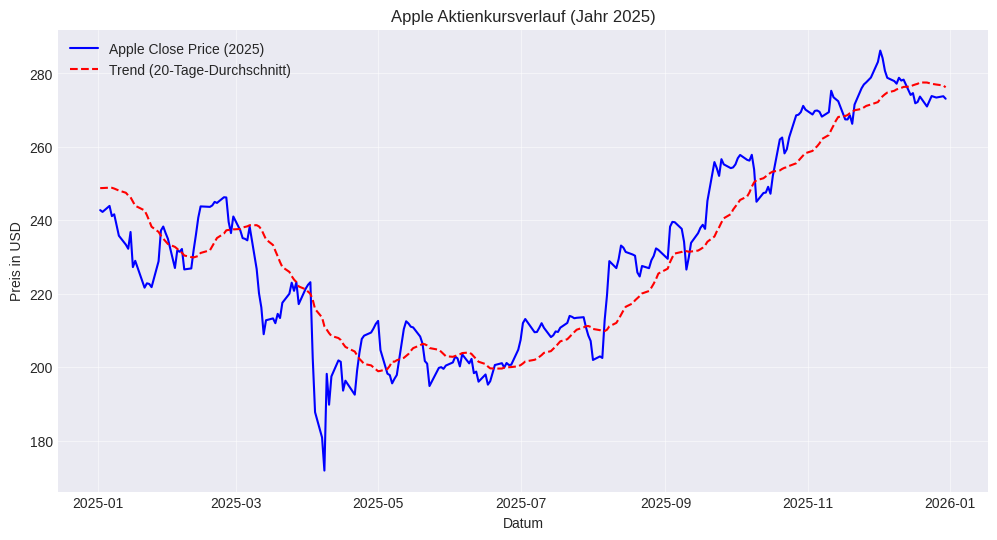

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8-darkgrid')

# Daten laden: Erweitert für SMA-Berechnung, aber nur 2025 wird geplottet
# Startdatum auf 2024-12-01 gesetzt, um 20 Tage historische Daten für den 01.01.2025 zu gewährleisten
Data_Apple_full = yf.download(
    tickers=["AAPL"],
    start="2024-12-01",
    end="2025-12-31"
)

# Berechnung des gleitenden Durchschnitts (20 Tage)
sma_20_full = Data_Apple_full["Close"].rolling(window=20).mean()

# Daten auf das Jahr 2025 filtern
filtered_close_2025 = Data_Apple_full["Close"].loc["2025-01-01":"2025-12-31"]
filtered_sma_20_2025 = sma_20_full.loc["2025-01-01":"2025-12-31"]

# Plot
plt.figure(figsize=(12, 6))
plt.plot(filtered_close_2025, label="Apple Close Price (2025)", color="blue")
plt.plot(filtered_sma_20_2025, label="Trend (20-Tage-Durchschnitt)", color="red", linestyle="--")
plt.title("Apple Aktienkursverlauf (Jahr 2025)")
plt.xlabel("Datum")
plt.ylabel("Preis in USD")
plt.legend()
plt.grid(alpha=0.5)
plt.show()

**Interpretation der Kurs-Visualisierung:**
Die Grafik zeigt die Preisentwicklung (blaue Linie) im Verhältnis zum **20-Tage-Trend (SMA 20, rote Linie)**.

* **Trend-Indikation:** Solange der Aktienkurs oberhalb der roten gestrichelten Linie verläuft, befindet sich die Aktie technisch gesehen oft in einem kurz- bis mittelfristigen Aufwärtstrend. Fällt der Kurs signifikant darunter, kann dies als Warnsignal für eine Korrekturphase gewertet werden.


**Starker Kursabfall bis Anfang von Q2**

* Der starke Kursabfall im Anfang des Jahres und vor allem Anfang April ist auf die US-Zollpolitik zurückzuführen. Der amerikanische Präsident hat in diesem Zeitraum hohe Straf- und Zusatzzölle auf einen Großteil der Importe verhängt.

### 2. Rendite- und Risikoanalyse (Volatilität)
Neben dem Preis ist das Risiko (*Volatilität*) die wichtigste Kennzahl für Anleger. Wir berechnen hierfür zwei Metriken: die tägliche prozentuale Rendite und die rollierende Standardabweichung (Volatilität).

Um korrekte Indikatoren für den Jahresstart 2025 zu erhalten, laden wir im Hintergrund Daten ab **Januar 2024**, da der 252-Tage-Indikator (Jahres-Volatilität) 252 Tage Vorlaufzeit benötigt.

/tmp/ipython-input-822054939.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  Data_Calculation = yf.download(
[*********************100%***********************]  1 of 1 completed


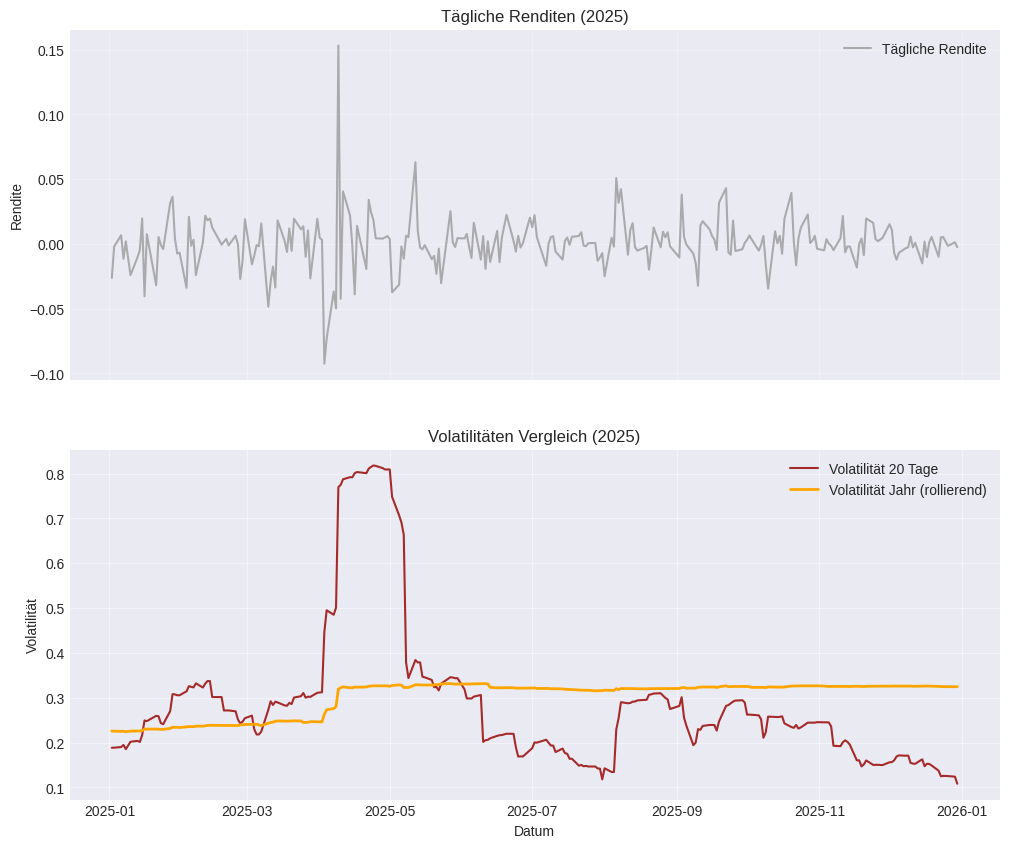

Volatilität am Jahresende 2025: 32.44%


In [ ]:
# Daten laden (ab 01/2024 -> 252 Tage Vorlaufzeit)
Data_Calculation = yf.download(
    tickers=["AAPL"],
    start="2024-01-01",
    end="2025-12-31"
)

# Berechnung
Data_Calc_Cl = Data_Calculation["Close"]
Data_Calc_Pct = Data_Calc_Cl.pct_change()

# Rollierende Volatilität
std_rolling_year = Data_Calc_Pct.rolling(window=252).std() * np.sqrt(252)
std_rolling_month = Data_Calc_Pct.rolling(window=20).std() * np.sqrt(252)

# nur 2025 plotten
mask_2025 = Data_Calc_Pct.index >= "2025-01-01"

plot_pct = Data_Calc_Pct.loc[mask_2025]
plot_std_year = std_rolling_year.loc[mask_2025]
plot_std_month = std_rolling_month.loc[mask_2025]

# Visualisierung
fig, (graph1, graph2) = plt.subplots(nrows=2, ncols=1, figsize=(12, 10), sharex=True)

# Graph 1: Tägliche Renditen (Nur 2025)
graph1.plot(plot_pct, color="grey", alpha=0.6, label="Tägliche Rendite")
graph1.set_title("Tägliche Renditen (2025)")
graph1.set_ylabel("Rendite")
graph1.legend(loc="upper right")
graph1.grid(alpha=0.3)

# Graph 2: Volatilität (Nur 2025, mit Vorlaufzeit)
graph2.plot(plot_std_month, label="Volatilität 20 Tage", color="brown")
graph2.plot(plot_std_year, label="Volatilität Jahr (rollierend)", color="orange", linewidth=2)

graph2.set_title("Volatilitäten Vergleich (2025)")
graph2.set_xlabel("Datum")
graph2.set_ylabel("Volatilität")
graph2.legend()
graph2.grid(alpha=0.5)

plt.show()

# Volatilität Jahresende
last_val = plot_std_year.iloc[-1]
print(f"Volatilität am Jahresende 2025: {last_val.iloc[0]:.2%}")

**Interpretation der Risiko-Analyse:**

1.  **Oberer Graph (Tägliche Rendite):**
    * Die graue Linie zeigt die "Nervosität" des Marktes von Tag zu Tag.
    * Starke Schwankungen deuten auf Phasen hoher Unsicherheit oder externe Schocks hin.

2.  **Unterer Graph (Volatilität p.a.):**
    * **Blaue Linie (252 Tage):** Zeigt das langfristige, strukturelle Risiko der Aktie. Sie bewegt sich langsam und zeigt den "Grundzustand" des Risikos.
    * **Orange Linie (20 Tage):** Zeigt das taktische, kurzfristige Risiko. Steigt diese Linie stark an, herrscht akute Panik oder Euphorie im Markt.

### 3. Stress-Test: Der Maximum Drawdown
Nachdem wir die Volatilität betrachtet haben, analysieren wir nun das Worst-Case-Szenario für einen Anleger. Der **Maximum Drawdown** misst den maximalen kumulierten Verlust von einem historischen Höchststand bis zum darauffolgenden Tiefststand.

Das ist wichtig, weil die Volatilität Schwankungen in bei richtungen misst, während sich der Drawdown nur auf das Verlustrisiko fokussiert.

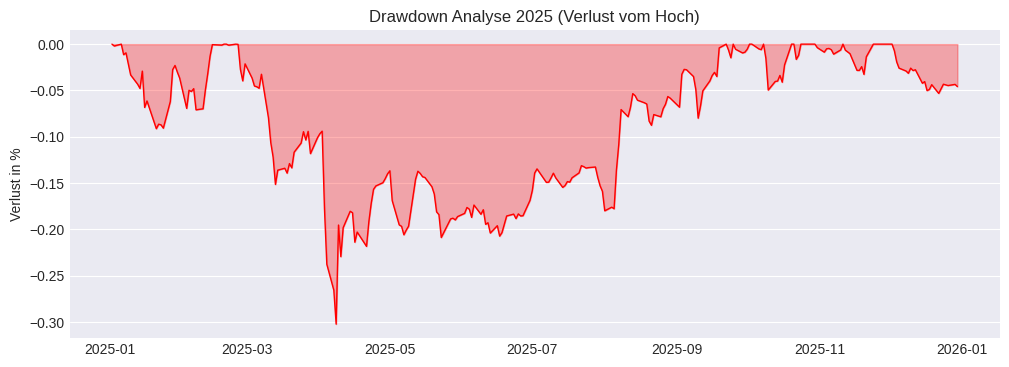

Der maximale Verlust vom Höchststand betrug im Jahr 2025: -30.22%


In [ ]:
# Berechnung Drawdown
Close = filtered_close_2025
Running_Max = Close.cummax() # Bisheriger Höchststand
Drawdown = (Close - Running_Max) / Running_Max # Prozentualer Abstand zum Hoch

plt.figure(figsize=(12, 4))
plt.fill_between(Drawdown.index, Drawdown['AAPL'], color="red", alpha=0.3)
plt.plot(Drawdown['AAPL'], color="red", linewidth=1)
plt.title("Drawdown Analyse 2025 (Verlust vom Hoch)")
plt.ylabel("Verlust in %")
plt.grid(axis="x")
plt.show()

max_dd = Drawdown.min().iloc[0]
print(f"Der maximale Verlust vom Höchststand betrug im Jahr 2025: {max_dd:.2%}")

**Interpretation des Drawdowns:**
* 2025 gab es einen maximalen Verlust (Drawdown) von **ca. -30%**. Das ist für eine Aktie wie Apple ungewöhnlich viel. Grund dafür ist die US-Zollpolitik.

* Die Erholung zum alten Hoch nimmt viel Zeit in Anspruch.

### 4. Relative Performance: Vergleich mir Konkurrenz
Wir vergleichen **Apple (AAPL)** mit **Xiaomi (XIACY)**, **Sony (SONY)** und **Samsung (005930.KS)**.

Um die Aktien vergleichbar zu machen, setzen wir alle Kurse zu Jahresbeginn auf **100%**. So sehen wir sofort, ob Apple gegenüber den Konkurrenten Out- oder Underperformer ist.

[*********************100%***********************]  4 of 4 completed


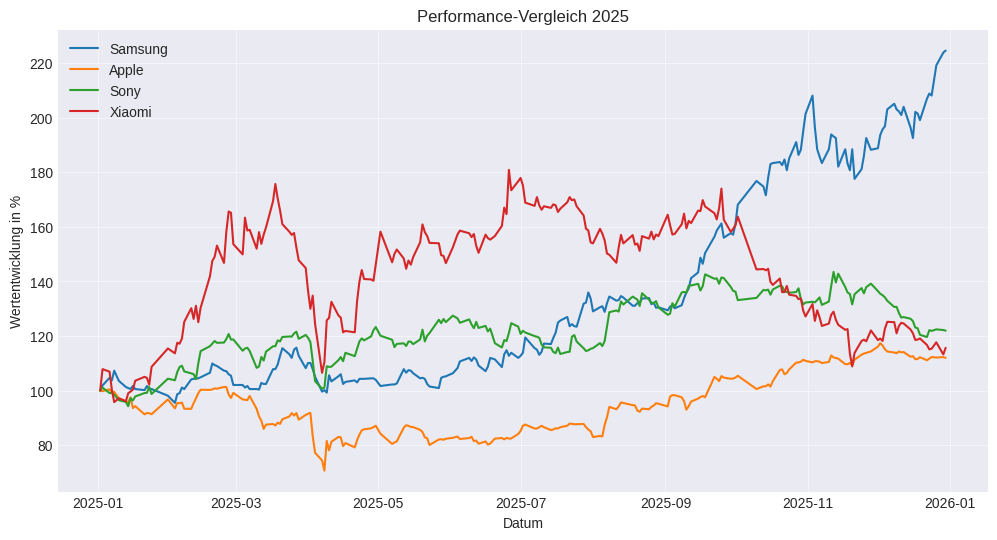

In [ ]:
tickers = ["AAPL", "XIACY", "SONY", "005930.KS"]
company_names = {  # Unternehmensname statt Aktienname
    "AAPL": "Apple",
    "XIACY": "Xiaomi",
    "SONY": "Sony",
    "005930.KS": "Samsung"
}
# Daten 2025 laden
Data_alle = yf.download(tickers, start="2025-01-01", end="2025-12-31", auto_adjust=False)
Data_alle_cl = Data_alle["Close"].dropna()

# Rebasierung
Data_Rebased = (Data_alle_cl / Data_alle_cl.iloc[0]) * 100

plt.figure(figsize=(12, 6))
for col in Data_Rebased.columns:
    plt.plot(Data_Rebased.index, Data_Rebased[col], label=company_names.get(col, col))

plt.title("Performance-Vergleich 2025")
plt.xlabel("Datum")
plt.ylabel("Wertentwicklung in %")
plt.legend()
plt.grid(alpha=0.5)
plt.show()

**Interpretation des Vergleichs:**
* **Samsung** hat die dargestellte Konkurrenz gerade zum Ende des Jahrs stark outperformt.
* **Apple** ist dagegen nahezu über das ganze Jahr das Schlusslicht, hat aber am Jahresende prozentual nicht viel schlechter abgeschlossen als Sony und Xiaomi.

### 5. Korrelationsanalyse und Diversifikation
Nun untersuchen wir die **Korrelation**, welche den Gleichlauf der täglichen Renditen auf einer Skala von -1 bis +1 misst.
* **+1.0:** Perfekter Gleichlauf (Aktie A steigt, Aktie B steigt genau so).
* **0.0:** Kein Zusammenhang.
* **-1.0:** Gegenläufige Entwicklung (Aktie A steigt, Aktie B fällt).

Um das Risiko zu streuen, möchte man idealerweise Aktien kombinieren, die *nicht* perfekt kollerieren.

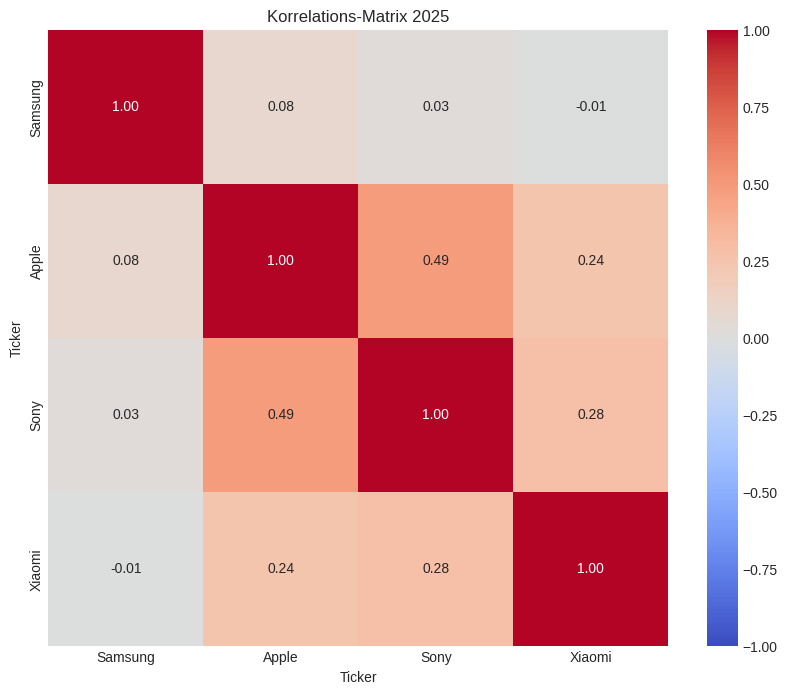

In [ ]:
Data_alle_pct = Data_alle_cl.pct_change().dropna()

company_names = {
    "AAPL": "Apple",
    "XIACY": "Xiaomi",
    "SONY": "Sony",
    "005930.KS": "Samsung"
}

Data_alle_pct_renamed = Data_alle_pct.rename(columns=company_names)

plt.figure(figsize=(10, 8))
sns.heatmap(Data_alle_pct_renamed.corr(), annot=True, cmap="coolwarm", vmin=-1, vmax=1, fmt=".2f")
plt.title("Korrelations-Matrix 2025")
plt.show()

**Interpretation der Korrelationen:**
* **Sony (ca. 0.49):** Hier sehen wir die stärkste Korrelation. Da beide Unternehmen ähnliche Wirtschaftssektoren ansprechen, ist das gut nachvollziehbar.
* **Samsung (ca. 0.08):** Diese Korrelation ist sehr niedrig, was bedeutet, dass sich die Samsung-Aktie nahezu komplett unabhängig von der Apple-Aktie bewegt.

Besitzt man also eine Apple-Aktie und möchte das Portfolio möglichst Risikoarm erweitern, sollte man aus dieser Auswahl zur Samsung-Aktie greifen.

### 6. Detail-Analyse: Verteilung der Renditen
Um das Verhältnis zwischen **Apple** und
1. **Sony** - stärkste Korrelation
2. **Samsung** - schwächste Korrelation

noch genauer zu verstehen, nutzen wir ein **Histogramm**.

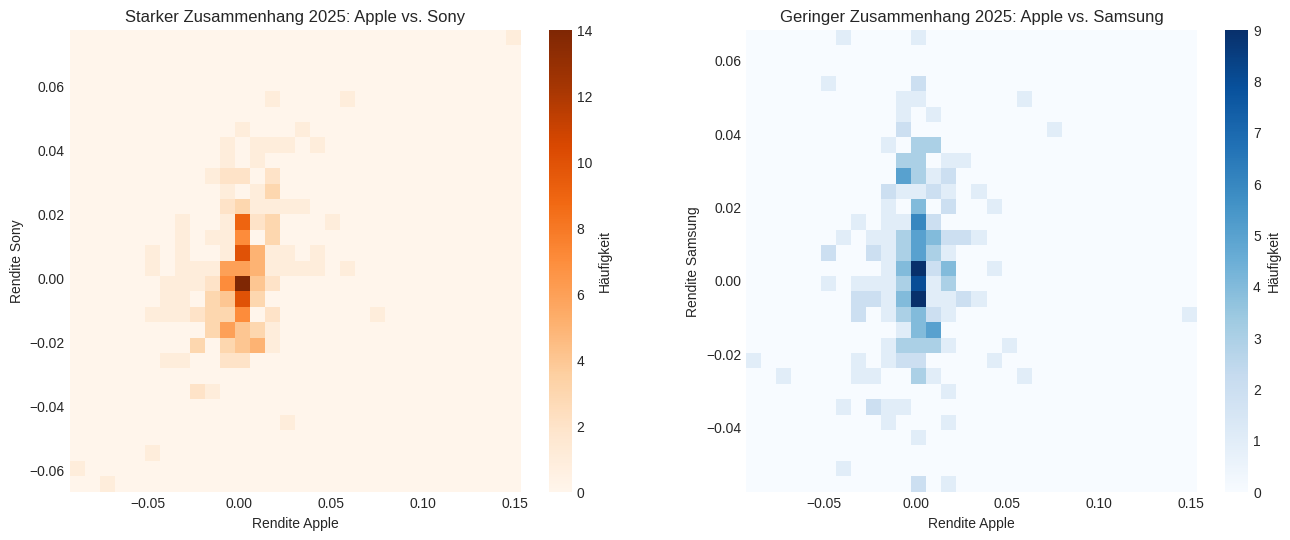

Stärkste Korrelation: Sony (0.49)
Schwächste Korrelation: Samsung (0.08)


In [ ]:
corr_to_apple = Data_alle_pct.corr()['AAPL'].sort_values(ascending=False)

highest_corr_ticker = corr_to_apple.index[1]

lowest_corr_ticker = corr_to_apple.index[-1]

company_names = {
    "AAPL": "Apple",
    "XIACY": "Xiaomi",
    "SONY": "Sony",
    "005930.KS": "Samsung"
}

highest_corr_name = company_names.get(highest_corr_ticker, highest_corr_ticker)
lowest_corr_name = company_names.get(lowest_corr_ticker, lowest_corr_ticker)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Hohe Korrelation
# bins=30
h1 = ax1.hist2d(Data_alle_pct['AAPL'], Data_alle_pct[highest_corr_ticker], bins=30, cmap='Oranges')
ax1.set_title(f"Starker Zusammenhang 2025: Apple vs. {highest_corr_name}")
ax1.set_xlabel('Rendite Apple')
ax1.set_ylabel(f'Rendite {highest_corr_name}')
fig.colorbar(h1[3], ax=ax1, label='Häufigkeit')

# Plot 2: Geringe Korrelation
h2 = ax2.hist2d(Data_alle_pct['AAPL'], Data_alle_pct[lowest_corr_ticker], bins=30, cmap='Blues')
ax2.set_title(f"Geringer Zusammenhang 2025: Apple vs. {lowest_corr_name}")
ax2.set_xlabel('Rendite Apple')
ax2.set_ylabel(f'Rendite {lowest_corr_name}')
fig.colorbar(h2[3], ax=ax2, label='Häufigkeit')

plt.show()

# Werte ausgeben
print(f"Stärkste Korrelation: {highest_corr_name} ({corr_to_apple.iloc[1]:.2f})")
print(f"Schwächste Korrelation: {lowest_corr_name} ({corr_to_apple.iloc[-1]:.2f})")

**Interpretation der Histogramme**
1. Die Aktienkurse von **Apple** und **Sony** haben sich 2025 relativ ähnlich bewegt.
2. Dagegen hat sich der Aktienkurs von **Samsung** eher unabhängig von **Apple** bewegt.

### 7. Fundamentale Perspektive: Quartalsumsätze
Zum Abschluss verlassen wir die technische Chartanalyse und werfen einen Blick auf die **Fundamentaldaten**. Der Aktienkurs ist langfristig immer ein Spiegelbild der wirtschaftlichen Realität des Unternehmens.

Wir visualisieren die Quartalsumsätze der letzten Perioden, um saisonale Muster und den Wachstumstrend zu erkennen.

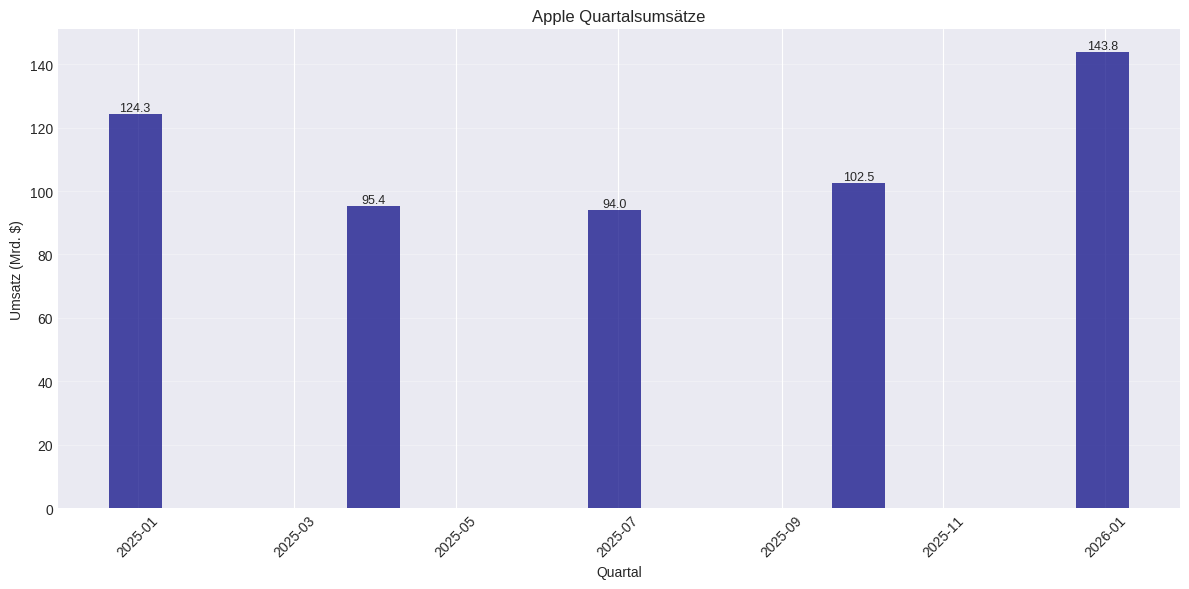

In [ ]:
apple_ticker = yf.Ticker("AAPL")
quartals_bilanz = apple_ticker.quarterly_financials
umsatz_daten = quartals_bilanz.loc["Total Revenue"].iloc[::-1]
umsatz_mrd = umsatz_daten / 1e9

# Wir filtern grob auf die relevanten letzten Quartale (z.B. die letzten 12 für 3 Jahre)
umsatz_mrd_recent = umsatz_mrd.tail(12)

plt.figure(figsize=(12, 6))
plt.bar(umsatz_mrd_recent.index, umsatz_mrd_recent.values, color="navy", alpha=0.7, width=20)

plt.title("Apple Quartalsumsätze")
plt.xlabel("Quartal")
plt.ylabel("Umsatz (Mrd. $)")
plt.grid(axis="y", alpha=0.3)

for i, v in enumerate(umsatz_mrd_recent.values):
    plt.text(umsatz_mrd_recent.index[i], v + 1, f"{v:.1f}", ha='center', fontsize=9)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Interpretation der Fundamentaldaten:**
Das Balkendiagramm zeigt die klassische "Saisonalität" im Geschäftsmodell von Apple:
* **Das Weihnachtsquartal (Q1):** Apple hat ein verschobenes Geschäftsjahr. Das erste Quartal (Okt–Dez) ist traditionell das stärkste, da hier die neuen iPhone-Modelle verkauft werden und das Weihnachtsgeschäft stattfindet.
* **Der Jahresverlauf:** In den darauffolgenden Quartalen sinkt der Umsatz meist leicht ab, bevor er zum Ende des Jahres wieder anzieht.

---
### AI Usage Declaration
Im Rahmen der Erstellung dieses Notebooks wurden KI-gestützte Tools (z.B. Google Gemini) verwendet. Diese kamen primär zum Einsatz, um
1.  Effizienteren Python-Code für die Visualisierungen zu generieren.
2.  Die Strukturierung der Analyse und der Markdown-Texte zu verbessern.
3.  Fehlermeldungen im Code zu debuggen.
---